In [1]:
# bike rental system in New York city

In [2]:
import mglearn

In [3]:
citibike = mglearn.datasets.load_citibike()

In [7]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


In [11]:
#data with rental frequency

In [33]:
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64

Text(0, 0.5, 'Rentals')

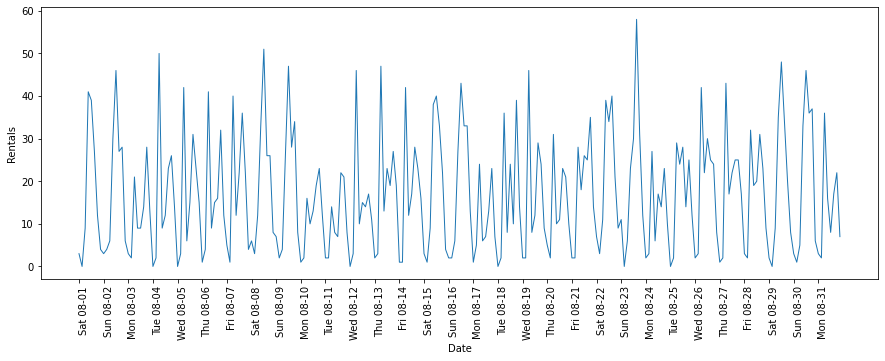

In [41]:
#necessito library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize = (15,5))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq = 'D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [31]:
# when evaluating a prediction task on time series
# we want to learn from the past and predict from the future
# when splitting into training and testing dataset 
# use all data up to certain date as training dataset and data past that date as the test set - intresting

In [56]:
# extract number of rentals
y = citibike.values

# convert the time to POSIX time using %s
X = citibike.index.strftime("%s").astype("int")
#X = X.reshape(-1,-1)

In [47]:
X

Int64Index([1438401600, 1438412400, 1438423200, 1438434000, 1438444800,
            1438455600, 1438466400, 1438477200, 1438488000, 1438498800,
            ...
            1440972000, 1440982800, 1440993600, 1441004400, 1441015200,
            1441026000, 1441036800, 1441047600, 1441058400, 1441069200],
           dtype='int64', name='starttime', length=248)

In [50]:
n_train = 184

def eval_on_feature(features, target, regressor):
    # splitting data into training and testing dataset
    X_train,X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    # fit 
    regressor.fit(X_train,y_train)
    print("Test set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10,3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,ha = "left")
    
    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train, len(y_test) + N-train), y_test, '-',label = "test")
    plt.plot(range(n_train), y_pred_train,'--',label="prediction train")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred,'--',label = "prediction test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
plt.figure()
#eval_on_feature(X, y, regressor)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>